In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import factorial as sfactorial

**Problem 1** 15pts: 
    
1a) 3pts - In NumPy, create an array of points between $-5$ and $11.323$ with spacing $.0285$.  If you can not do this exactly, how close can you get?  

1b) 3pts - Using vectorization, plot $f(x) = 3x^{4} + 3x^{2} + 2$ for $-5\leq x \leq 11.323$.  Make sure your graph is labeled.   
1c) 3pts - Using vectorization in Python, find the sum 

$$
\sum_{j=0}^{n}(4j^{3} + 3j^{2} + 2)
$$

for $n=30,50$.

1d) 3pts - For the integers less than 10,000, what is the sum of those numbers which are divisible by 7, 13, or 18?  

1e) 3pts - For the recurrence relation

$$
p_{n} = 3p_{n-4} - 2p_{n-3} + 3p_{n-1}, ~ n\geq 4, 
$$

where 

$$
p_{0}= .1, ~ p_{1}=2.1, ~ p_{2} = .235, ~ p_{3} = 0,
$$

what is $p_{n}$ for $n=5$, $10$, and $20$?

_Answer to Problem 1_

In [2]:
#1A
array1 = np.linspace ( -5 , 11.323, int(  (  11.323 - -5) / .0285 ) + 1  )

print ("True Spacing = .0285")
print ("Linspace Attempt: ", array1[1] - array1 [0])
print ("How Close I was: ",  .0285 - (array1[1] - array1 [0]))

True Spacing = .0285
Linspace Attempt:  0.028536713286713145
How Close I was:  -3.671328671314353e-05


Text(0.5, 1.0, '$1B$')

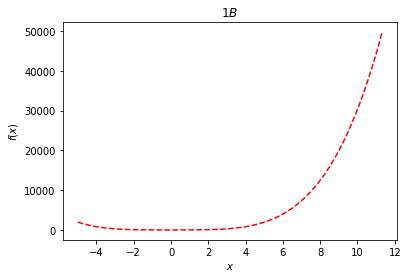

In [3]:
#1B
def FofX(x):
    return ( ( 3 * ( x **4) ) + ( 3 * ( x **2) ) + 2)

xvals = np.linspace ( -5 , 11.323, int(  (  11.323 - -5 + 1  ) / .0285 )   )

plt.plot (xvals, FofX(xvals), ls = "--", color = "r")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('$1B$')

In [4]:
#1C

def Sum(n):
    tot = 0
    An = 0
    for jj in range(0, int(n) + 1):
        j3 = jj**3
        j2 = jj**2
        tot += (4*j3) + (3*j2)  + 2
    return tot


print (" n = 30: " ,Sum(30))
print (" n = 50: " ,Sum(50))

 n = 30:  893327
 n = 50:  6631377


In [5]:
#1D

def div_sum(n):
    tot = 0
    for jj in range(0, int(n) + 1):
        if (jj % 7 == 0) or ( jj % 13 == 0) or (jj % 18 == 0):
            tot += jj
        else:
            tot += 0
    return tot
    
div_sum(10000)

12647598

In [6]:
#1E

def Pn(n):
    p0 = .1
    p1 = 2.1
    p2 = .235
    p3 = 0
    if n >= 4:
        for jj in range(4, int(n) +1):
            pn = ( 3 * p0) - ( 2 * p1) + ( 3 * p3)
            p0 = p1
            p1 = p2
            p2 = p3
            p3 = pn
        return pn
    elif n == 3:
        return p3
    elif n == 2:
        return p2
    elif n == 1:
        return p1
    elif n == 0:
        return p0
    
print (" n = 5: ",Pn (5) )
print (" n = 10: " ,Pn (10) )
print (" n = 20: " ,Pn (20) )

 n = 5:  -5.87
 n = 10:  -1074.63
 n = 20:  -42809333.39000001


**Problem 2**: 15pts - Given the function

$$
y(x) = \sum_{l=0}^{\infty} \frac{(-1)^{l}x^{2l}}{3^{l}l!}
$$

2a) 6pts - Determine a recurrence relation between the coefficients.

2b) 6pts - In Python, develop a tolerance based, recursive, vectorized implementation of this function.  

2c) 3pts - Plot this function on the interval $[0,5]$ for tolerances $10^{-6}$ and $10^{-8}$.  Comment on any phenomena you see.  Make sure graphs are labeled, have a legend, and are well sized.  

_Answer to Problem 2_

#2A
Reccurence Relation between Coefficients
$$
\begin {align}
a_{l} = & \frac{-x^{2}}{3l} a_{l-1} ,& a_0 = 1
\end {align}
$$


In [7]:
#2B
def FofX (x,tol):
    tot = np.ones(x.size)
    aj = np.ones(x.size)
    jj = 1
    nx2 = -1* x**2
    while np.max(np.abs(aj)) >= tol:
        aj *= (nx2) / (3*jj)
        tot += aj
        jj += 1
    return tot

Text(0, 0.5, 'yvals')

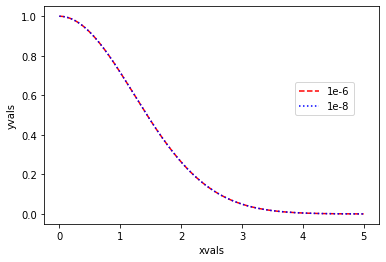

In [8]:
#2C

xvals = np.linspace(0, 5, int(1e4))
plt.plot (xvals, FofX(xvals, 1e-6), ls="--", color = 'r', label = "1e-6")
plt.plot (xvals, FofX(xvals, 1e-8), ls = ":", color = 'b', label = "1e-8")
plt.legend(loc=(.75, .5))
plt.xlabel("xvals")
plt.ylabel("yvals")

**Problem 3**: 15pts - Write a program (7pts) that generates the iterative sequence
$$
\phi_{n} = a\phi_{n-1} + b\phi_{n-2}, ~ n\geq 2, ~ a,b\in \mathbb{R}.
$$
Your program must take $a$, $b$, $\phi_{0}$, $\phi_{1}$, and the maximum value of $N$ as input, i.e. your program should produce a plot of the sequence for $0\leq n \leq N$.  (4pts) Generate labeled semi-log plots of $|\phi_{n}|$ up to $N=40$ for the parameter values 

* $a = 1$, $b = 3$, $\phi_{0}=1$, $\phi_{1}=2$,
* $a = -3$, $b = -1/2$, $\phi_{0}=2$, $\phi_{1}=1$.

Explain the behavior you see in the graphs (4pts).  In particular, find the slope of the lines in your plots in the large $N$ limit both computationally and analytically.  Hint: In order to get the analytic result, you need to use a guess for the solution of the form 
$$
\phi_{n} = \lambda^{n}.
$$
Then plug in your guess, and solve for $\lambda$.  You know, like with the Fibonacci numbers.

_Answer to Problem 3_

Slope of Line 1 (Blue) :  0.36225162602855576
Slope of Line 2 (Orange) :  0.4506917483893821
Analytic Slope:  1.0690503945106902


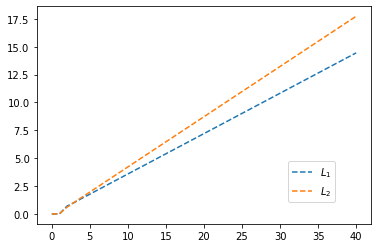

In [9]:
#3
def iterative_seq( a, b , x0, x1, N):
    xn = np.ones( int(N) + 1)
    if N>=2:
        xn[0] = x0
        xn[1] = x1
        for val in range(2, int(N) + 1):
            xn[val] = ( a * xn[1] ) + ( b * xn[0] )
            xn [0] = xn [1]
            xn [1] = xn[val]
        return xn[val]
    elif N == 0:
        return xn[0]
    elif N == 1:
        return xn[1]
    else:
        return null
    
nvals = np.linspace(0, 40, 41)

#plt.plot(nvals, [iterative_seq( 1, 3, 1, 2, nval) for nval in nvals])
#plt.plot(nvals, [iterative_seq( -3, -1/2, 2, 1, nval) for nval in nvals])

yvals1 = np.log10(np.abs([iterative_seq( 1, 3, 1, 2, nval) for nval in nvals]))
yvals2 = np.log10(np.abs([iterative_seq( -3, -1/2, 2, 1, nval) for nval in nvals]))

plt.plot(nvals, yvals1, ls = "--", label = "$L_1$")
plt.plot(nvals, yvals2, ls = "--", label = "$L_2$")

plt.legend(loc=(.75, .1))

yvals140 = ( np.log10( np.abs( iterative_seq( 1, 3, 1, 2, 40) ) ) )
yvals130 = ( np.log10( np.abs( iterative_seq( 1, 3, 1, 2, 30) ) ) )
yvals240 = ( np.log10( np.abs( iterative_seq(-3, -1/2, 2, 1, 40) ) ) )
yvals230 = ( np.log10( np.abs( iterative_seq( -3, -1/2, 2, 1, 30) ) ) )

slope = (yvals140 - yvals130) / (40 - 30)
print ("Slope of Line 1 (Blue) : ", slope)
slope = (yvals240 - yvals230) / (40 - 30)
print ("Slope of Line 2 (Orange) : ", slope)
print ("Analytic Slope: ", yvals140 ** (1/40) )

**Problem 4**: 15pts -  For the integral,
$$
\int_{0}^{\pi/2}\cos(\cos(x^{2}))dx, 
$$
use 

* (7pts) a Taylor series to the third order (i.e. keep up to cubic terms) around $x=0$ to approximate the integral, 
* (6pts) a Taylor series to the third order chosen appropriately to approximate each integral on the right hand side of the expression

$$
\int_{0}^{\pi/2}\cos(\cos(x^{2}))dx = 
\int_{0}^{\pi/6}\cos(\cos(x^{2}))dx + \int_{\pi/6}^{\pi/3}\cos(\cos(x^{2}))dx + \int_{\pi/3}^{\pi/2}\cos(\cos(x^{2}))dx.
$$

* (2pts) Using NumPy, one can find that 
$$
\int_{0}^{\pi/2}\cos(\cos(x^{2}))dx =  1.137063808641665
$$
Find the error in each of your approximations, state which is better, and explain why it is better.  

_Answer to Problem 4_

In [10]:
#4
# x - center
def Order0 (x):
    return np.cos(np.cos(x**2))

def Order1 (x):
    return (2 * (x) *  ( np.sin(x**2) ) * ( np.sin(np.cos(x**2)) ) )

def Order2 (x):
    return ( (-4) * (x**2) * ( np.sin(x**2) ** 2) * ( np.cos(np.cos(x**2)) ) ) + ( 4 * (x**2) * ( np.sin(np.cos(x**2)) ) * ( np.cos(x**2) ) ) + ( 2 * (np.sin(x**2)) * (np.sin(np.cos(x**2))))

def Order3 (x):
    return (( ((-24) * (x**3) * (np.sin(x**2)) * (np.cos(x**2)) ) - ( 12 * (x) * (np.sin(x**2) ** 2)) ) * (np.cos(np.cos(x**2)) )) - (( ( 8 * (x**3) * (np.sin(x**2) ** 3) ) + ( 8 * (x**3) * (np.sin(x**2)) ) + ( (-12) * (x) * (np.cos(x**2)) ) ) * (np.sin(np.cos(x**2))) ) 


In [11]:
def Integral_Approx (a, b, center):
    return ((Order0 (center) * (b-center)) + (Order1 (center) *  (((b-center)**2) / 2 )) + (Order2 (center) * (((b-center)**3) / 6)) + (Order3 (center) * (((b-center)**4) / 24))) - ((Order0 (center) * (a-center)) + (Order1 (center) *  (( (a-center)**2) / 2 )) + (Order2 (center) * (( (a-center)**3) / 6)) + (Order3 (center) * (( (a-center)**4) / 24)))

In [12]:
def Center_Approx (center) :
    return Integral_Approx (0, np.pi /6, center) + Integral_Approx (np.pi / 6, np.pi /3, center) + Integral_Approx (np.pi / 3, np.pi /2, center)

def cvalcalc():
    cvals = np.linspace(0 , np.pi /2, int(1e4))
    for cval in cvals:
        if (Center_Approx(cval) >= 1.1370) and (Center_Approx(cval) <= 1.1371):
            return (np.pi / cval)

print ("The Best Center to Approximate the Integral within a Timely Manner: " + '\u03C0' + " /",cvalcalc())
actual = 1.137063808641665
print ("Actual: ", actual)
print ("Approximation: ",Center_Approx (np.pi / cvalcalc()) )
print ("Error in this Approximation is: ", np.abs(Center_Approx (np.pi / cvalcalc()) -  actual))

The Best Center to Approximate the Integral within a Timely Manner: π / 23.527058823529412
Actual:  1.137063808641665
Approximation:  1.1370446257238758
Error in this Approximation is:  1.918291778912895e-05


/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Text(0, 0.5, 'Approx Values')

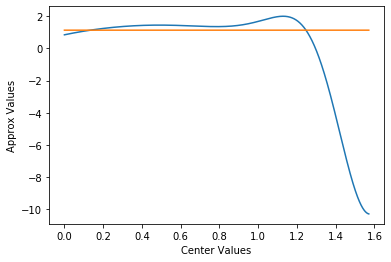

In [13]:
cvals = np.linspace (0, np.pi / 2, 1e4)
wvals = np.linspace(1.137063808641665, 1.137063808641665, 1e4)
plt.plot(cvals, [Center_Approx (cval) for cval in cvals])
plt.plot(cvals, wvals)
plt.xlabel("Center Values")
plt.ylabel("Approx Values")

Approximating with multiple integrals and my center of about $\frac {\pi}{24}$ gives the least amount of error.  
<br>
The reason for the center I believe is that as the centers increase their error increases with them based off the graph above.  The only 2 points of intesection is approximately $\frac {\pi}{24}$ and $\frac {\pi}{2.52}$

**Problem 5**: 10pts - The $(p,q)$ hypergeometric function is defined as 
$$
_{p}F_{q}(a_{1},\cdots,a_{p};b_{1},\cdots,b_{q};x) = \sum_{n=0}^{\infty} \frac{\left(a_{1}\right)_{n}\cdots\left(a_{p}\right)_{n}}{\left(b_{1}\right)_{n}\cdots\left(b_{q}\right)_{n}}\frac{x^{n}}{n!}
$$
where $a_{j}\in \mathbb{R}$, $b_{l}\in \mathbb{R}$ and for any real value $a$ we have the recursion relationship
\begin{align*}
(a)_{0} = & 1 \\
(a)_{n} = & (a+n-1)(a)_{n-1}, ~ n\geq 1.
\end{align*}
So for example, we have that 
$$
_{0}F_{0}(;;x) = \sum_{n=0}^{\infty}\frac{1}{1}\frac{x^{n}}{n!} = e^{x}, 
$$
and if we have the Bessel function $J_{n}(x)$ where 
$$
J_{n}(x) = \sum_{m=0}^{\infty} \frac{(-1)^{m}}{m! (m+n)!}\left(\frac{x}{2} \right)^{2m + n} = \frac{1}{n!}\left(\frac{x}{2}\right)^{n}\sum_{m=0}^{\infty}\frac{1}{(n+1)_{m}}\frac{1}{m!}\left(\frac{-x^{2}}{4}\right)^{m}, 
$$
since
\begin{align*}
(m+n)! = & n!(n+1)(n+2)\cdots(n+m) \\
= &n!(n+1)(n+1 + 1)\cdots(n+1+m-1) \\
= & n!(n+1)_{m},
\end{align*}
then we have 
$$
J_{n}(x) = \frac{1}{n!}\left(\frac{x}{2}\right)^{n}  ~_{0}F_{1}\left(;n+1;-\frac{x^{2}}{4}\right).
$$

Write a program which computes the $(p,q)$ hypergeometric function.  It should take as input vectors ${\bf a}$ and ${\bf b}$ where 
\begin{align*}
{\bf a} = & (a_{1},~ a_{2},~ \cdots,~ a_{p}) \\ 
{\bf b} = & (b_{1},~ b_{2},~ \cdots,~ b_{q}) 
\end{align*}
and an evaluation point $x$.  Note, your program should determine $p$ and $q$ using the length of $a$ and $b$ respectively.  Make sure you vectorize your function.  Make sure you make efficient use of recursion.  Clearly explain the stopping criteria you choose and why you choose it.  Test your code by comparing your results to those you would get using the implementation for the Bessel functions we developed in the lectures.  

Then, using NumPy's version of the functions as the _true_ values, numerically prove the identity

$$
\sin^{-1}(x) = x \cdot _{2}F_{1}\left(\frac{1}{2},\frac{1}{2};\frac{3}{2};x^{2}\right)
$$

Generate semi-log plots of the difference of the two functions over meshes on $[-.5,.5]$ and argue why this shows the identities are true.  Note, you may need to adapt your stopping condition to adequately answer this problem.  

_Answer to Problem 5_

In [14]:
def pqfunction (a, b , x, N):
    p = a.size
    q = b.size
    for n in np.arange(1, N):
        for p in np.arange(0, a.size):
            a_n[0][p] = 1
            a_n[n][p] = (a[p] + n - 1) * (a_n[n - 1][p])
    for n in np.arange(1, N):
        for p in np.arange(0, b.size):
            b_n[0][p] = 1
            b_n[n][p] = (b[p] + n - 1) * (b_n[n - 1][p])
    
    for p in np.arange(0, a.size):
        multA *= a_n[N][p]
    for p in np.arange(0, b.size):
        multB *= b_n[N][p]
        
    return (multA / multB) * (1 /N.sfactorial ) * (x**N)
    

I tried my best :)

**-5**

**Total: 65/70**